In [45]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 15})



2976


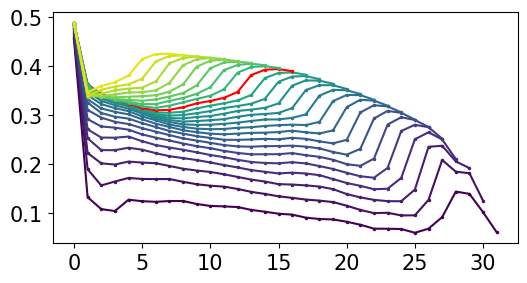

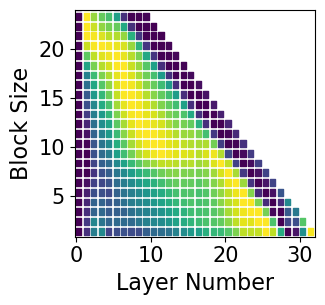

In [56]:


def file_reader(fname):
    f = open(fname)
    last_token_sim = json.load(f)
    # last_token_sim = np.array(data)
    # print(last_token_sim.shape)
    f.close()
    return last_token_sim

# model_name = "/data/llama-hf/Llama-2-7b-hf"
# model_name = "mistralai/Mistral-7B-v0.1"
# model_name = "Qwen/Qwen-14B"
model_name = "microsoft/phi-2"


out_dir = "data/"
num_layers = 32
step_list = np.arange(1,25)
# step_list = np.arange(1,0.8*num_layers+1).astype(int)
colors = plt.cm.viridis(np.linspace(0,1,1+len(step_list)))
x_min = []
y_min = []

fname = out_dir+ f"c4_{model_name.split('/')[-1]}_steps.json"
# fname = out_dir+ f"mmlu_{model_name.split('/')[-1]}_steps.json"

similarity =  file_reader(fname)
print(len(similarity["1"]))


# plt.figure(figsize=(5,4))
# plt.figure()
for idx, step in enumerate(step_list):
# for idx, step in enumerate([1]):
    x = np.arange(num_layers-step+1)
    y =  np.arccos(np.array(similarity[f"{step}"])).mean(axis=0)/np.pi
    y_min = y.min()
    y_max = y[2:-2].max()
    # y /= y_min
    y_rescaled = (y- y_min)/(y_max-y_min)
    # y_max = 1.4
    # y_min = 1.0
    # y_max = y[1:-2].max()#/2 if y.max()/2 > y_min else y.max()
    # y_plot = np.linspace(y_min,y_max,len(y))
    y_color = np.linspace(0,1,len(y))
    colors_bar = plt.cm.viridis_r(y_color)
    plt.figure(1,figsize=(3.5,3.3))
    width = num_layers/(num_layers-step+1)
    for i_y, y_val in enumerate(y_rescaled):
        color = np.zeros(4)
        for i in range(4):
            # color[i]=np.interp(y_val, y_plot, colors_bar[:,i])
            color[i]=np.interp(y_val, y_color, colors_bar[:,i])
        box_dim = 0.7
        plt.fill_between(np.array([i_y,i_y+box_dim]),[step,step],[step+box_dim,step+box_dim], color = color)
    # plt.text(num_layers+1, step+0.4, f"{step}")
    plt.figure(2,figsize=(6,3))
    if step == num_layers//2:
        plt.plot(x, y,"r.-", markersize=3,linewidth=1.5,label=f"{step}")
    else:
        plt.plot(x, y,".-", markersize=3,linewidth=1.5,color=colors[idx],label=f"{step}")

plt.figure(1)
plt.xlabel(r"Layer Number, $\ell$",fontsize=16)# (similarity btw in and out of [x,x+1,x+2])")
plt.ylabel(r"Block Size, $n$",fontsize=16)
plt.xticks(np.arange(0,31,10))
# plt.title(f"{model_name.split('/')[-1]}", fontsize= 10)
# plt.axis('scaled')
plt.ylim([0.8,step_list.max()])
plt.xlim([-0.2,num_layers])
# plt.grid()
# plt.xlim(15.5,27.5)
# plt.ylim(0.05,0.25)
# plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
fig_dir = "../../forward pass/figures/"
plt.savefig(fig_dir+f"ang_dist_color_{model_name.split('/')[-1]}.pdf")
plt.show()

/tmp/ipykernel_1393860/3218151105.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_1393860/3218151105.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


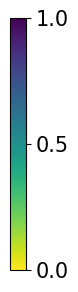

In [91]:
a = np.array([[0,1]])
plt.figure(figsize=(0.2, 4.2))
img = plt.imshow(a, cmap="viridis_r")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="vertical", cax=cax)
plt.yticks([0,0.5,1.0])
plt.tight_layout()
plt.savefig(fig_dir+f"ang_dist_colorbar.pdf")
plt.show()

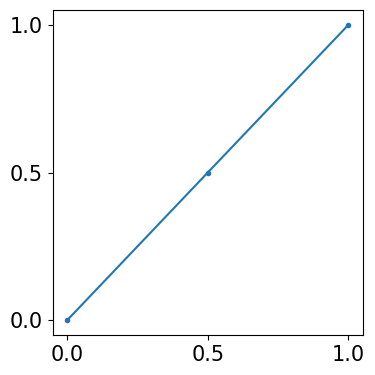

In [96]:
x_arr = np.array([0,0.5,1.])
plt.figure(figsize=(4,4))
plt.plot(x_arr,x_arr,".-")
plt.xticks(x_arr)
plt.yticks(x_arr)
plt.tight_layout()
plt.savefig(fig_dir+"ang_dist_colorbar_ticklabels.pdf")
